#### core dataframe functions

1. pd.DataFrame()
2. df.grouby
3. dftransform
4. df.apply
5. pd.merge
6. pd.join()
7. pd.concat()
8. df.to_frame()
9. df.to_csv()
10. df.head()
11. df.describe()
12. df.sort_values()

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from data_cleaning import remove_stopwords, comments_to_words, lemmatization, professor_tags
from sklearn.feature_extraction.text import CountVectorizer
import swifter
import pandas as pd
import numpy as np
import gensim
import pickle
import re
import collections
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

#### Exploratory Data Analysis

In [3]:
datafile = "RateMyProfessor_Sample_data.csv"
df = pd.read_csv(datafile)

In [4]:
f"Total rows : {len(df)}"

'Total rows : 20000'

In [5]:
df.describe()

,year_since_first_review,star_rating,diff_index,num_student,student_star,student_difficult,help_useful,help_not_useful,word_comment,asian,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
count,20000.00000,20000.000000,20000.000000,20000.000000,19995.000000,19995.000000,20000.000000,20000.000000,19993.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.82350,3.643825,2.956345,33.266850,3.616879,2.988147,0.293850,0.185450,36.961086,0.022525,...,0.201350,0.134250,0.217750,0.116150,0.102800,0.080700,0.098350,0.076750,0.067900,0.020100
std,3.91505,0.836048,0.776795,31.321627,1.457886,1.308825,0.860139,0.720614,21.303202,0.026088,...,0.401019,0.340929,0.412727,0.320413,0.303705,0.272381,0.297795,0.266201,0.251581,0.140346
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,3.000000,2.400000,15.000000,2.500000,2.000000,0.000000,0.000000,18.000000,0.007562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.00000,3.700000,3.000000,24.000000,4.000000,3.000000,0.000000,0.000000,38.000000,0.016080,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.00000,4.300000,3.500000,41.000000,5.000000,4.000000,0.000000,0.000000,57.000000,0.031384,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.00000,5.000000,5.000000,321.000000,5.000000,5.000000,9.000000,9.000000,142.000000,0.388363,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df.columns

Index(['professor_name', 'school_name', 'department_name', 'local_name',
       'state_name', 'year_since_first_review', 'star_rating', 'take_again',
       'diff_index', 'tag_professor', 'num_student', 'post_date',
       'name_onlines', 'name_not_onlines', 'student_star', 'student_difficult',
       'attence', 'for_credits', 'would_take_agains', 'grades', 'help_useful',
       'help_not_useful', 'comments', 'word_comment', 'gender', 'race',
       'asian', 'hispanic', 'nh_black', 'nh_white', 'gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'skip_class', 'amazing_lectures',
       'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read',
       'lots_of_homework', 'accessible_outside_class', 'lecture_heavy',
       'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy',
       'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline'],
      dtype='object')

In [8]:
df.department_name = df['department_name'].apply(lambda s: ' '.join(s.split()[:-1])) # shortening dept name

In [9]:
schools = df.school_name.unique()
depts = df.department_name.unique()


In [93]:
len(schools), len(depts)

(554, 101)

### Total Schools

In [10]:
df_schools = df.groupby('school_name')['school_name'].count()
df_schools

school_name
Abilene Christian University        20
Acadia University                   19
Albright College                    19
Alma College                         4
Alvernia University                 18
                                  ... 
Wright State University             39
Yale University                      2
York College of Pennsylvania         8
York University (all campuses)     220
York University- Glendon campus     20
Name: school_name, Length: 554, dtype: int64

In [11]:
df_schools.idxmin(), df_schools.min()

('University of Massachusetts', 1)

In [12]:
df_schools.idxmax(), df_schools.max()

('Volunteer State Community College', 860)

### Total Departments

In [13]:
df_depts = df.groupby('department_name')['department_name'].count()

df_depts

department_name
ASL & Deaf Studies       18
Accounting              264
Accounting & Finance     20
African Studies          19
Agriculture               6
                       ... 
Theater                 218
Theology                165
Visual Arts              18
Women\'s Studies         96
Writing                 115
Name: department_name, Length: 101, dtype: int64

In [95]:
df_depts.loc['Computer Science']

654

In [14]:
df_depts.idxmin(), df_depts.min()

('Comparative Literature', 1)

In [96]:
df_depts.idxmax(), df_schools.max()

('English', 860)

### Total Professors

In [16]:
df_profs = df.groupby('professor_name')['professor_name'].count()

df_profs

professor_name
A  Osaitile          20
A  Ruttenbur          5
A J  Senchack        10
Aaron  Fogel         20
Aaron  Kozbelt       20
                     ..
Ying  Wang           20
Younghe  Kim Park    20
Yousif  Shamoo        6
Zeno  Swijtink       20
Zeynep  Tenger       16
Name: professor_name, Length: 1413, dtype: int64

In [17]:
df_profs.idxmax(), df_profs.max()

('Alan  Bell', 38)

In [18]:
df_profs.idxmin(), df_profs.min()

('Baron  Stewart', 1)

In [19]:
custom_words = ['professor', 'class', 'teacher', 'question']

sentences = df['comments'].values.tolist()
data_words = list(comments_to_words(sentences))
data_nostop_words = remove_stopwords(data_words, custom_words)
lemmatized_data = lemmatization(data_nostop_words, allowed_word_types = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [20]:
# Lower case + Tokenization only (for word clouds)

clean_reviews = []
for sen in data_words:
        clean_sen = ' '.join(word for word in sen)
        clean_reviews.append(clean_sen)
len(clean_reviews)

df['clean_reviews'] = clean_reviews

In [21]:
df['clean_reviews']

0        this class is hard but its two in one gen ed k...
1        definitely going to choose prof looney class a...
2        overall enjoyed this class because the assignm...
3        yes it possible to get an but you ll definitel...
4        professor looney has great knowledge in astron...
                               ...                        
19995              great sense of humor love parasites now
19996    he is really nice guy and is really funny howe...
19997    his parasitology class is lot of work but he m...
19998    he is way too much work for credit class shegn...
19999    extremely easy lab teacher quizzes are little ...
Name: clean_reviews, Length: 20000, dtype: object

In [23]:
clean_reviews_nostop = [ ' '.join(word for word in sen) for sen in data_nostop_words]
len(clean_reviews_nostop)

df['clean_reviews_nostop'] = clean_reviews_nostop

df['clean_reviews_nostop']

0        hard two one gen ed knockout content stimulati...
1        definitely going choose prof looney interestin...
2        overall enjoyed assignments straightforward in...
3        yes possible get definitely work content prett...
4        looney great knowledge astronomy explain super...
                               ...                        
19995                     great sense humor love parasites
19996    really nice guy really funny however bio hasnt...
19997    parasitology lot work makes extremely interest...
19998    way much work credit shegnoski nice helpful mu...
19999    extremely easy lab quizzes little difficult th...
Name: clean_reviews_nostop, Length: 20000, dtype: object

In [24]:
# superclean_reviews = [ ' '.join(word for word in sen) for sen in lemmatized_data]
# len(superclean_reviews)

# df['superclean_reviews'] = superclean_reviews

# df['superclean_reviews']

In [25]:
df.comments[0]

'This class is hard, but its a two-in-one gen-ed knockout, and the content is very stimulating. Unlike most classes, you have to actually participate to pass. Sections are easy and offer extra credit every week. Very funny dude. Not much more I can say.'

In [26]:
df.clean_reviews[0]

'this class is hard but its two in one gen ed knockout and the content is very stimulating unlike most classes you have to actually participate to pass sections are easy and offer extra credit every week very funny dude not much more can say'

In [27]:
df.comments

0        This class is hard, but its a two-in-one gen-e...
1        Definitely going to choose Prof. Looney\'s cla...
2        I overall enjoyed this class because the assig...
3        Yes, it\'s possible to get an A but you\'ll de...
4        Professor Looney has great knowledge in Astron...
                               ...                        
19995     Great sense of humor!!!! Love parasites now!!!!!
19996    he is a really nice guy and is really funny..h...
19997    His parasitology class is a lot of work but he...
19998    He is WAY too much work for a 1 credit class. ...
19999    Extremely easy lab teacher, quizzes are a litt...
Name: comments, Length: 20000, dtype: object

In [28]:
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews,clean_reviews_nostop
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,this class is hard but its two in one gen ed k...,hard two one gen ed knockout content stimulati...
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,definitely going to choose prof looney class a...,definitely going choose prof looney interestin...
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,overall enjoyed this class because the assignm...,overall enjoyed assignments straightforward in...
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,yes it possible to get an but you ll definitel...,yes possible get definitely work content prett...
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,professor looney has great knowledge in astron...,looney great knowledge astronomy explain super...


In [ ]:
# df.to_csv('Clean_data.csv')

In [ ]:
# professors = df['professor_name'].values.tolist()
# df.tag_professor = df.tag_professor.fillna('')
# tags = df['tag_professor'].values.tolist()
# prof_tags_dict = collections.defaultdict(list)
# for i in range(len(tags)):  
#     tgs = re.sub('\(\d\)',':', tags[i])
#     clean_tags = [x.strip() for x in tgs.split(':') if x!='']
#     freqs = re.findall('(\d)', tags[i])
#     tag_freqs = list(zip(clean_tags, freqs))
#     prof_tags_dict[professors[i]] = tag_freqs
        
    
# with open('prof_tags_dict.pickle', 'wb') as handle:
#     pickle.dump(prof_tags_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('prof_tags_dict.pickle', 'rb') as handle:
#     b = pickle.load(handle)

#### WordCloud


In [29]:
dff = df[df['clean_reviews'] != 'comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews'] != 'no comments']  # No comments ~ comments after removing stop words

dff = df[df['clean_reviews_nostop'] != 'comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews_nostop'] != 'no comments']  # No comments ~ comments after removing stop words


dff

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews,clean_reviews_nostop
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,this class is hard but its two in one gen ed k...,hard two one gen ed knockout content stimulati...
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,definitely going to choose prof looney class a...,definitely going choose prof looney interestin...
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,overall enjoyed this class because the assignm...,overall enjoyed assignments straightforward in...
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,yes it possible to get an but you ll definitel...,yes possible get definitely work content prett...
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,professor looney has great knowledge in astron...,looney great knowledge astronomy explain super...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,1,1,0,0,0,1,0,great sense of humor love parasites now,great sense humor love parasites
19996,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,1,1,0,0,0,1,0,he is really nice guy and is really funny howe...,really nice guy really funny however bio hasnt...
19997,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,1,1,0,0,0,1,0,his parasitology class is lot of work but he m...,parasitology lot work makes extremely interest...
19998,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,1,1,0,0,0,1,0,he is way too much work for credit class shegn...,way much work credit shegnoski nice helpful mu...


In [ ]:
# wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', 
#                       colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(tweet_string)

In [34]:
def f(x):
    d = {}
    d['star_rating'] = x['star_rating'].max()
    d['clean_reviews_concat'] = ' '.join(x['clean_reviews'])
    d['clean_reviews_nostop_concat'] = ' '.join(x['clean_reviews_nostop'])
    return pd.Series(d, index=['star_rating', 'clean_reviews_concat', 'clean_reviews_nostop_concat'])


dfprofs = dff.groupby('professor_name').apply(f)

In [35]:
dfprofs = dfprofs.join(df_profs.to_frame('count'))

In [36]:
dfprofs

,star_rating,clean_reviews_concat,clean_reviews_nostop_concat,count
professor_name,,,,
A Osaitile,3.7,loved professor osaitile he was very sweet and...,loved osaitile sweet really cared students exp...,20
A Ruttenbur,3.4,ms ruttenbur was extremely helpful in class sh...,ms ruttenbur extremely helpful made priority s...,5
A J Senchack,3.2,anybody who does not think prof senchack is on...,anybody think prof senchack one best teachers ...,10
Aaron Fogel,4.0,worst professor have ever had lectures jump fr...,worst ever lectures jump topic topic hard foll...,20
Aaron Kozbelt,4.7,he such gen he genuinely cares that you unders...,gen genuinely cares understand answer question...,20
...,...,...,...,...
Ying Wang,4.9,wang laoshi is honestly the best am so glad to...,wang laoshi honestly best glad took chinese mo...,20
Younghe Kim Park,4.0,went through lectures too fast funny teacher t...,went lectures fast funny tough grader half gon...,20
Yousif Shamoo,3.9,in terms of research he is very cutthroat he w...,terms research cutthroat anything grant money ...,6


#### Number of reviews were in the range [1-38]

In [37]:
dfprofs['count'].max(), dfprofs['count'].min()

(38, 1)

In [38]:
dftopProfs = dfprofs.sort_values('star_rating', ascending=False)[0:20]

dftopProfs

,star_rating,clean_reviews_concat,clean_reviews_nostop_concat,count
professor_name,,,,
Sparkle Raymond,5.0,she is probably one of the best teachers have ...,probably one best teachers ever makes fun hila...,2
K McFadden,5.0,great great that all can say hate math and did...,great great say hate math good goes step step ...,4
Michael Downs,5.0,excellent teacher very engaging demands that y...,excellent engaging demands learn contribute lo...,4
Ryan G Vancleave,5.0,great guy and professor alot of work but if yo...,great guy alot work well course comments man v...,10
Diane Sandhoff,5.0,loved her as clinical instructor classroom was...,loved clinical instructor classroom wonderful ...,2
B Dennis,5.0,he makes everything very clear and very easy e...,makes everything clear easy enjoyed hate write...,2
Robert Werner,5.0,he is very helpful and nice professor what guy...,helpful nice guy nice guy always help need com...,4
Rob Wells,5.0,one of the best professors have ever had the b...,one best professors ever best plu far great le...,20
Richard T. Rodriguez,5.0,awesome teacher makes class fun easy to talk t...,awesome makes fun easy talk carring come back ...,4


In [39]:
dflowProfs = dfprofs.sort_values('star_rating')[0:20]

dflowProfs

,star_rating,clean_reviews_concat,clean_reviews_nostop_concat,count
professor_name,,,,
J. Weathers,1.0,no comments no comments,comments comments,2
J Harrison,1.0,took her online her test are really hard way h...,took online test really hard way harder isnt h...,1
Pat Cyrgalis,1.0,gives as little information as possible and if...,gives little information possible ask clarific...,12
Fred Williams,1.0,do not take any class this man teaches he is h...,take man teaches horrible teach one thing gave...,4
Jerome Cooper,1.0,avoid this professor did not grade according t...,avoid grade according stated criteria late ret...,1
Cindy Williams,1.2,this professor is in her st year and treats he...,st year treats students rd graders helps test ...,13
Roger Magyar,1.2,this guy is tough first of all everything he s...,guy tough first everything says seems hungary ...,6
Matthew Elam,1.2,the class was so boring he is my worst teacher...,boring worst life may repugnant instructor ent...,3
C Jackson,1.2,mr jackson was not helpful at all and was very...,mr jackson helpful unnecessarily demanding ter...,3


In [59]:
# wordcloud function
def show_wordcloud(data, color, title = None): # data - list of strings
    wordcloud = WordCloud(
        background_color = color,
        max_words = 100,
        max_font_size = 60, 
        scale = 3,
        random_state = 42,
        collocation_threshold = 5 
    # ).generate(str(data))
    ).generate(' '.join(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    

### Word cloud for Top 20 rated Professors

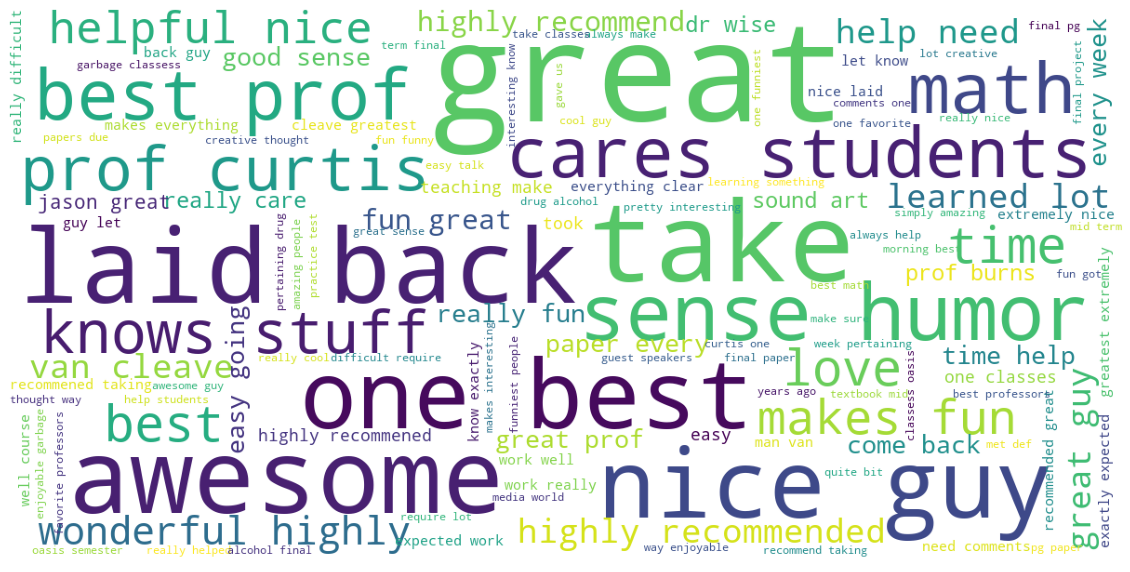

In [46]:
# show_wordcloud(list(dftopProfs['clean_reviews_concat']))

show_wordcloud(list(dftopProfs['clean_reviews_nostop_concat']), 'white')

### Word cloud for Bottom 20 rated Professors

 Helpful ~ "Not Helpful / Isn't very helpful "

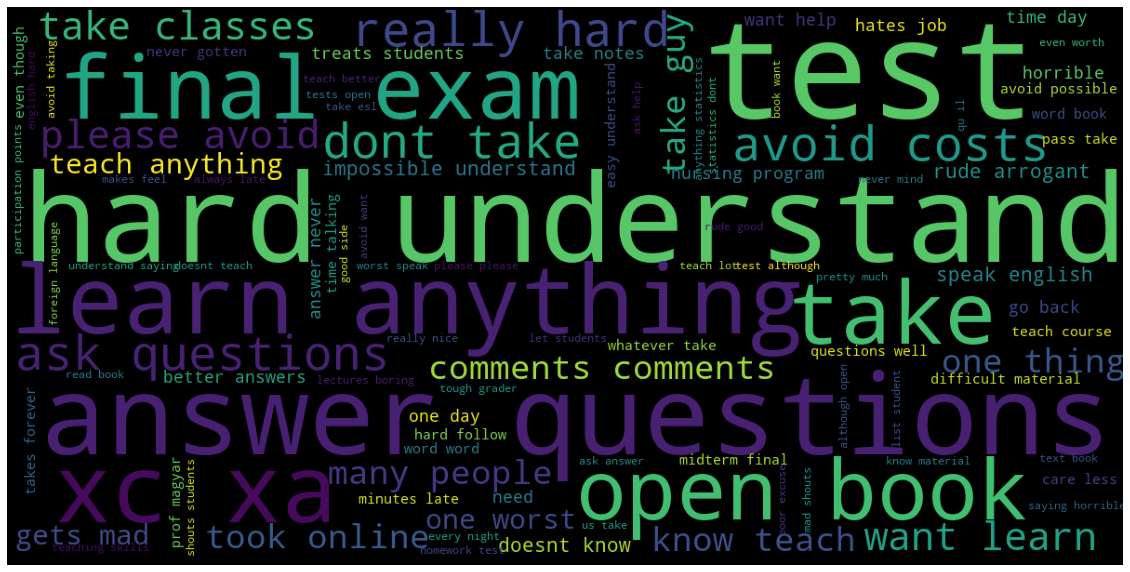

In [45]:
# show_wordcloud(list(dftopProfs['clean_reviews_concat']))

show_wordcloud(list(dflowProfs['clean_reviews_nostop_concat']), 'black')

### Bigrams & Trigrams word cloud

In [48]:
from nltk.util import ngrams
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
            
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [49]:
dflowProfs["bigram_text"] = dflowProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=2)
dflowProfs["trigram_text"] = dflowProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=3)

dftopProfs["bigram_text"] = dftopProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=2)
dftopProfs["trigram_text"] = dftopProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=3)


Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

In [50]:
# dflowProfs

In [51]:
# dftopProfs

In [52]:
# show_wordcloud(list(dflowProfs["bigram_text"]))

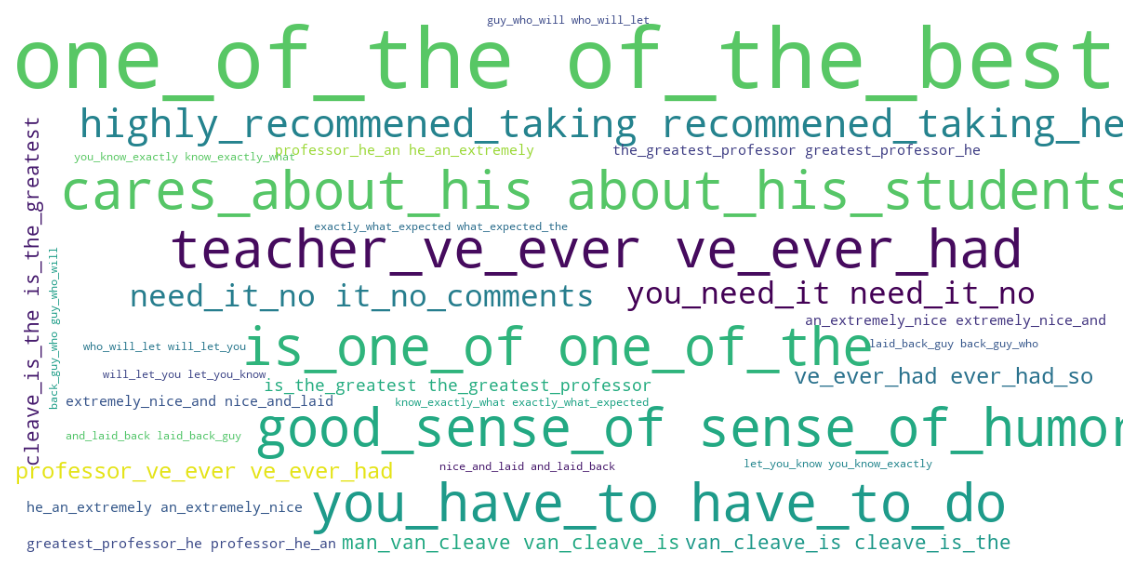

In [60]:
show_wordcloud(list(dftopProfs["trigram_text"]), 'white')

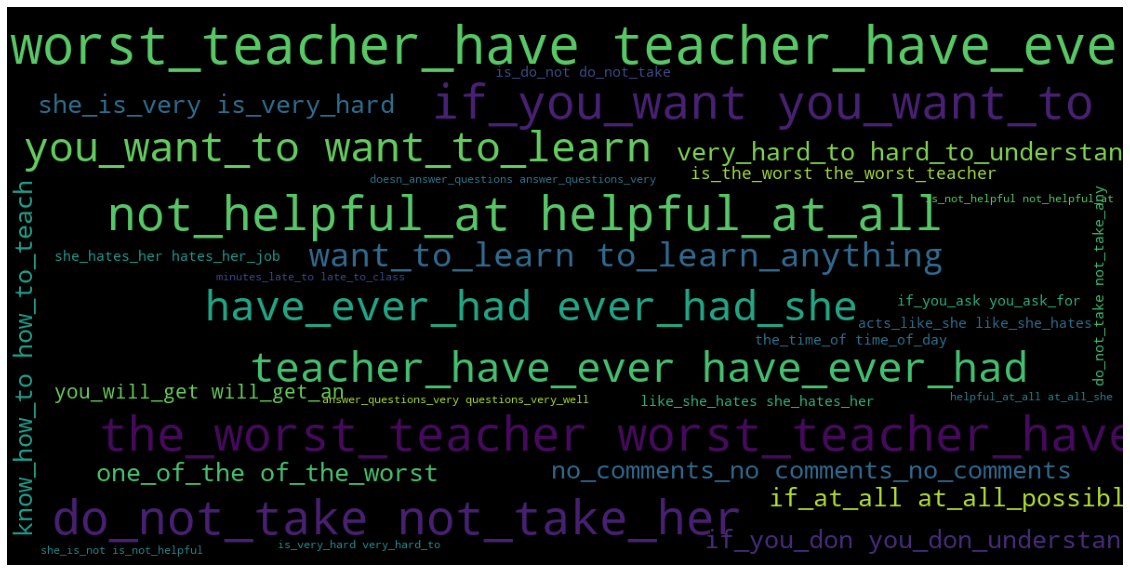

In [61]:
show_wordcloud(list(dflowProfs["trigram_text"]), 'black')

In [55]:
# show_wordcloud(list(dftopProfs["bigram_text"]))

## Sentiment Analysis

#### Preprocessing

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df["sentiments"] = df["comments"].apply(lambda review: sid.polarity_scores(str(review)))


In [63]:
df.comments

0        This class is hard, but its a two-in-one gen-e...
1        Definitely going to choose Prof. Looney\'s cla...
2        I overall enjoyed this class because the assig...
3        Yes, it\'s possible to get an A but you\'ll de...
4        Professor Looney has great knowledge in Astron...
                               ...                        
19995     Great sense of humor!!!! Love parasites now!!!!!
19996    he is a really nice guy and is really funny..h...
19997    His parasitology class is a lot of work but he...
19998    He is WAY too much work for a 1 credit class. ...
19999    Extremely easy lab teacher, quizzes are a litt...
Name: comments, Length: 20000, dtype: object

In [64]:
df["sentiments"]

0        {'neg': 0.022, 'neu': 0.685, 'pos': 0.293, 'co...
1        {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
2        {'neg': 0.053, 'neu': 0.531, 'pos': 0.415, 'co...
3        {'neg': 0.035, 'neu': 0.684, 'pos': 0.281, 'co...
4        {'neg': 0.026, 'neu': 0.549, 'pos': 0.426, 'co...
                               ...                        
19995    {'neg': 0.0, 'neu': 0.346, 'pos': 0.654, 'comp...
19996    {'neg': 0.095, 'neu': 0.823, 'pos': 0.082, 'co...
19997    {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...
19998    {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'comp...
19999    {'neg': 0.136, 'neu': 0.614, 'pos': 0.25, 'com...
Name: sentiments, Length: 20000, dtype: object

In [65]:
'''
Neg | Neu | Pos : Actual sentiment scores
Compound : Degree of the sentiment ~ [-1] extremely negative & [+1] extremely positive
'''
df['sentiments'].iloc[0]

{'neg': 0.022, 'neu': 0.685, 'pos': 0.293, 'compound': 0.9488}

In [66]:
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [67]:
df

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews,clean_reviews_nostop,neg,neu,pos,compound
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,this class is hard but its two in one gen ed k...,hard two one gen ed knockout content stimulati...,0.022,0.685,0.293,0.9488
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,definitely going to choose prof looney class a...,definitely going choose prof looney interestin...,0.000,0.660,0.340,0.9476
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,overall enjoyed this class because the assignm...,overall enjoyed assignments straightforward in...,0.053,0.531,0.415,0.9325
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,yes it possible to get an but you ll definitel...,yes possible get definitely work content prett...,0.035,0.684,0.281,0.9655
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,professor looney has great knowledge in astron...,looney great knowledge astronomy explain super...,0.026,0.549,0.426,0.9870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,great sense of humor love parasites now,great sense humor love parasites,0.000,0.346,0.654,0.8877
19996,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,he is really nice guy and is really funny howe...,really nice guy really funny however bio hasnt...,0.095,0.823,0.082,-0.1962
19997,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,his parasitology class is lot of work but he m...,parasitology lot work makes extremely interest...,0.000,0.572,0.428,0.9378
19998,Dennis Richardson,Quinnipiac University,Biology,Hamden,CT,15,4.0,NaN,3.5,BEWARE OF POP QUIZZES (4) Amazing lectures (3...,...,0,0,1,0,he is way too much work for credit class shegn...,way much work credit shegnoski nice helpful mu...,0.000,0.522,0.478,0.8750


### Correlation b/w Student Star Rating & Sentiment Score

In [68]:
# Classify as Bad or Good Review based on Student Star Rating ~ Range(0,5)
df["is_bad_review"] = df["student_star"].apply(lambda x: 1 if x < 3 else 0)

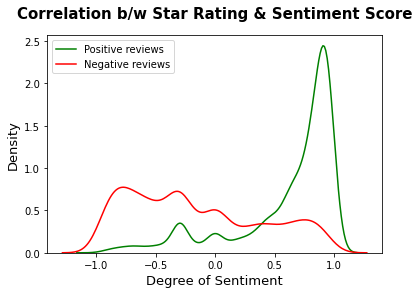

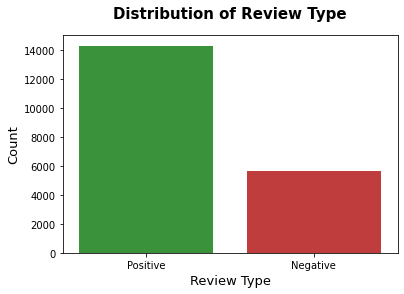

In [270]:
# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
for x in [0, 1]:
    subset = df[df['is_bad_review'] == x]
    # Draw the density plot
    if x == 0: label = "Positive reviews"
    else: label = "Negative reviews"
    sns.distplot(subset['compound'], hist = False, label = label, color = color[x])
    
plt.legend()
plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Density',fontsize = 13 , x=1.1)
plt.title("Correlation b/w Star Rating & Sentiment Score", fontsize = 15, weight='bold', y=1.05)
plt.show()

sns.countplot(x ='is_bad_review', data = df, palette = ["#2ca02c", "#d62728"])

plt.xlabel("Review Type", fontsize = 13, y=1.1)
plt.ylabel("Count", fontsize = 13 , x=1.1)
plt.xticks([0,1], ["Positive", "Negative"])
plt.title("Distribution of Review Type", fontsize = 15, weight='bold', y=1.05)
plt.show()


### Scatter Plot of Star Rating vs Sentimental Score for CS Department

In [99]:
df_CS = df[df['department_name'] == 'Computer Science']

len(df_CS)

654

In [105]:
# x = np.array(df_CS["compound"])
# y = np.array(df_CS["student_star"])

# plt.plot(x,y)

Text(0.5, 1.05, 'Rating Vs Sentiment (CSE Dept.)')

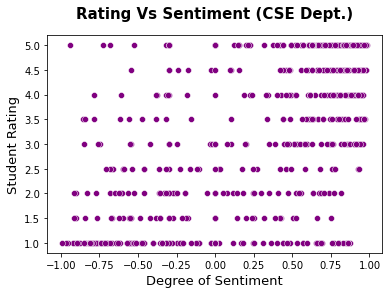

In [277]:
sns.scatterplot(x="compound", y="student_star", data = df_CS, color = "purple")

plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Student Rating', fontsize = 13, x=1.1)
plt.title('Rating Vs Sentiment (CSE Dept.)', fontsize = 15, weight='bold', y=1.05)

### Deep dive into Low Rating vs High Sentiment

In [ ]:
display(dataFrame.loc[(dataFrame['Salary']>=100000) & (dataFrame['Age']< 40) & (dataFrame['JOB'].str.startswith('D')),
                    ['Name','JOB']])





In [186]:
dff_anomaly = df_CS.loc[ (df_CS["student_star"] == 1) & (df_CS["compound"] > 0.75)]

list(dff_anomaly.comments)

["Extremely unintelligent, though well-intentioned. The Hunger class was a breeze if you read the books, but don\\'t expect to learn anything whatsoever from Sanders. He spends most of class time showing videos and telling personal anecdotes. Easily distracted and incapable of clearly answering simple questions. Easy A if that\\'s all you care about.",
 'She is clearly over her head and has no idea what she doing. She talks to hear herself be friendly, has no true industry in-site that does not come out of a book. She plays favorites, and is straight up two faced. Never take courses or the gaming degree from this school.',
 'Worst CIS teacher ever... Seriously he needs to retire or something. He seems like a pretty decent guy but what he teaches is completely irrelevant to what he gives out in his exams. Trust me just take another teacher and get a better grade.',
 "Awful. Makes a very difficult subject even more difficult. Java isn\\'t the easiest subject in the world to learn--and he

In [281]:
dff_anomaly['compound']

583      0.7686
3903     0.8750
6259     0.8500
6262     0.8600
6264     0.8020
14218    0.7551
14219    0.8271
14936    0.7964
14950    0.8614
Name: compound, dtype: float64

In [187]:
dff_anomaly

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,IsCourseOnline,clean_reviews,clean_reviews_nostop,neg,neu,pos,compound,is_bad_review,is_difficult,Sentiment
583,Bill Sanders,University of Hartford,Computer Science,West Hartford,CT,9,2.1,NaN,3.2,NaN,...,0,extremely unintelligent though well intentione...,extremely unintelligent though well intentione...,0.149,0.633,0.218,0.7686,1,0,Positive
3903,Anita Girton,Pennsylvania College of Technology,Computer Science,Williamsport,PA,12,3.5,NaN,2.4,GROUP PROJECTS (5) Participation matters (3) ...,...,0,she is clearly over her head and has no idea w...,clearly head idea talks hear friendly true ind...,0.070,0.685,0.245,0.8750,1,1,Positive
6259,David Martin,Montgomery County Community College (all),Computer Science,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,worst cis teacher ever seriously he needs to r...,worst cis ever seriously needs retire somethin...,0.075,0.692,0.233,0.8500,1,1,Positive
6262,David Martin,Montgomery County Community College (all),Computer Science,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,awful makes very difficult subject even more d...,awful makes difficult subject even difficult j...,0.208,0.495,0.297,0.8600,1,1,Positive
6264,David Martin,Montgomery County Community College (all),Computer Science,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,don take this professor if you have learning d...,take learning differences learning style work ...,0.000,0.884,0.116,0.8020,1,1,Positive
14218,Benny Lo,Devry University,Computer Science,Fremont,CA,5,1.7,NaN,2.1,NaN,...,0,the benny lo show hahaha this class is absolut...,benny lo show hahaha absolutely amazing amazin...,0.074,0.726,0.200,0.7551,1,0,Positive
14219,Benny Lo,Devry University,Computer Science,Fremont,CA,5,1.7,NaN,2.1,NaN,...,0,this professor was useless absolutely useless ...,useless absolutely useless aced midterm final ...,0.060,0.758,0.182,0.8271,1,0,Positive
14936,Jason Carland,Southwestern Community College,Computer Science,Sylva,NC,3,2.5,NaN,2.3,NaN,...,0,have to agree with the others it was the easie...,agree others easiest ever made want really kno...,0.000,0.794,0.206,0.7964,1,0,Positive
14950,Barry Cohen,New Jersey Institute of Technology,Computer Science,Newark,NJ,12,4.2,NaN,2.2,Participation matters (2) Caring (2) LOTS OF...,...,0,unfortunately the class does not use book and ...,unfortunately use book introductory basically ...,0.076,0.700,0.224,0.8614,1,1,Positive


In [168]:
sns.color_palette().as_hex()[8]

'#bcbd22'

In [154]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Correlation b/w Student Difficulty Rating & Sentiment Score

In [144]:
# Classify as Difficult (1) or Not Difficult(0) based on Student Difficult Score ~ Range(0,5) ~ Mean 2.99
df["is_difficult"] = df["student_difficult"].apply(lambda x: 1 if x > 3 else 0)

In [145]:
df["student_difficult"].min(), df["student_difficult"].max(), df["student_difficult"].mode()

(1.0,
 5.0,
 0    3.0
 Name: student_difficult, dtype: float64)

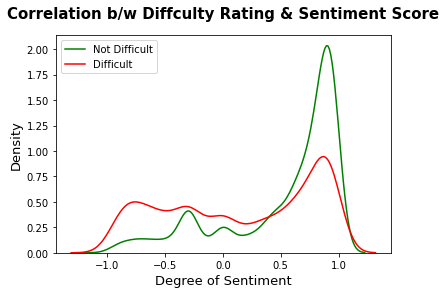

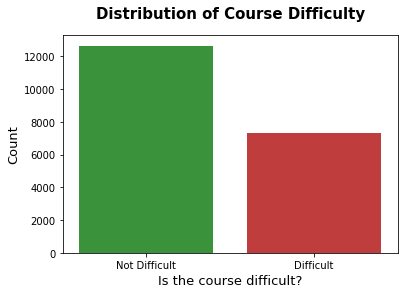

In [272]:
# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
color = ["green", "red"]
for x in [0, 1]:
    subset = df[df['is_difficult'] == x]
    # Draw the density plot
    if x == 0: 
        label = "Not Difficult"
    else: label = "Difficult"
    sns.distplot(subset['compound'], hist = False, label = label, color = color[x])
    
plt.legend()
plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Density',fontsize = 13 , x=1.1)
plt.title("Correlation b/w Diffculty Rating & Sentiment Score", fontsize = 15, weight='bold', y=1.05)
plt.show()

sns.countplot(x = 'is_difficult', data = df,  palette = ["#2ca02c", "#d62728"])
plt.xlabel("Is the course difficult?", fontsize = 13, y=1.1)
plt.ylabel("Count", fontsize = 13 , x=1.1)
plt.xticks([0,1], ["Not Difficult", "Difficult"])
plt.title("Distribution of Course Difficulty", fontsize = 15, weight='bold', y=1.05)
plt.show()



In [150]:
len(df[df['is_difficult'] == 0]), len(df[df['is_difficult'] == 1])

(12657, 7343)

### Overall Sentiment

Zoom in on any dept ? Or any college ?

In [188]:
def get_sentiment(x):

    if x['compound']>=0.20: return 'Positive'
    elif x['compound']<=-0.20: return 'Negative'
    else: return 'Neutral'
    
#     mapp = {0:'Negative', 1:'Neutral', 2:'Positive'}
#     i = np.argmax([x['neg'], x['neu'], x['pos']]) 

df['Sentiment'] = df.apply(get_sentiment, axis=1)

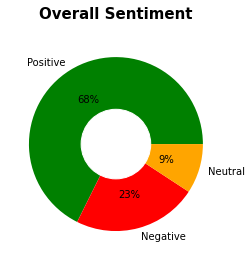

In [273]:
# create data
names = ['Positive', 'Negative', 'Neutral']

szPositive = len(df[df['Sentiment']=='Positive'])
szNegative = len(df[df['Sentiment']=='Negative'])
szNeutral = len(df[df['Sentiment']=='Neutral'])

size = [szPositive,szNegative,szNeutral]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.4, color='white')

# Give color names
plt.pie(size, labels = names, autopct='%1.0f%%', colors = ['green','red','orange'])

p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Overall Sentiment',  fontsize = 15, weight='bold', y=1.05)
plt.show()

### Sentiment Per Department  

101 departments - How to narrow it down?

- Take departments that have most no of ratings

In [201]:
def func(x):
    d = {}
    pos = len(x[x['Sentiment']=='Positive'])
    neu = len(x[x['Sentiment']=='Neutral'])
    neg = len(x[x['Sentiment']=='Negative'])
    
    total = pos+neu+neg
    d['#Positive'] = pos/total * 100
    d['#Neutral'] = neu/total * 100
    d['#Negative'] = neg/total * 100
    
    return pd.Series(d, index=['#Positive', '#Neutral', '#Negative'])
    
df_dept_sent = df.groupby('department_name').apply(func)

In [202]:
# Joining frequency
df_dept_sent

,#Positive,#Neutral,#Negative
department_name,,,
ASL & Deaf Studies,77.777778,5.555556,16.666667
Accounting,62.121212,11.742424,26.136364
Accounting & Finance,95.000000,0.000000,5.000000
African Studies,26.315789,15.789474,57.894737
Agriculture,83.333333,0.000000,16.666667
...,...,...,...
Theater,70.183486,8.715596,21.100917
Theology,72.121212,7.272727,20.606061
Visual Arts,83.333333,0.000000,16.666667


Text(0.5, 1.0, 'Sentiment Across Departments')

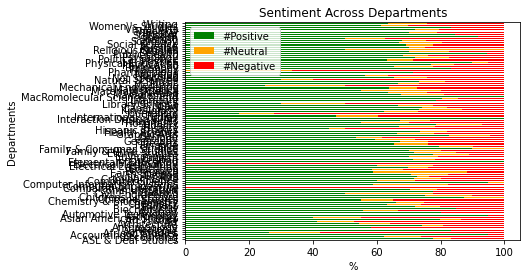

In [203]:
df_dept_sent.plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])
 
plt.legend
plt.xlabel('%')
plt.ylabel('Departments')
plt.title('Sentiment Across Departments')

### Sentiment Across STEM

Choosing:
1. Computer Science department
2. Physics department
3. Mathematics department
4. Chemistry department
5. Biology department
6. Geography department
7. Electrical Engineering department

In [204]:
stem = ['Computer Science', 'Physics', 'Mathematics', 'Chemistry', 'Biology', 'Geography', 'Electrical Engineering']

df_dept_sent_stem = df_dept_sent.loc[stem]


df_dept_sent_stem


,#Positive,#Neutral,#Negative
department_name,,,
Computer Science,59.938838,11.926606,28.134557
Physics,63.122924,8.305648,28.571429
Mathematics,63.713318,8.860045,27.426637
Chemistry,66.095890,8.561644,25.342466
Biology,71.892393,7.884972,20.222635
Geography,59.593023,12.500000,27.906977
Electrical Engineering,60.000000,17.500000,22.500000


Text(0.5, 1.0, 'Sentiment Across STEM Departments')

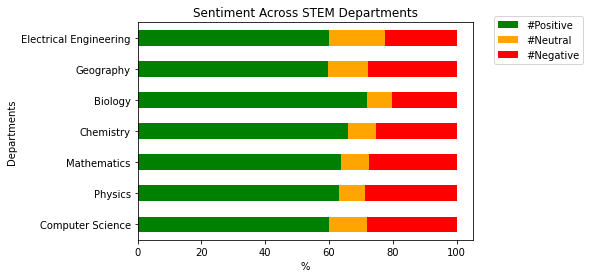

In [205]:
df_dept_sent_stem.plot(kind='barh', stacked=True, color=['green', 'orange', 'red'])

plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.xlabel('%')
plt.ylabel('Departments')
plt.title('Sentiment Across STEM Departments')

### Sentiment Across Most Rated Depts

In [211]:
df_dept_sent2 = df_dept_sent.join(df_depts.to_frame('count')).sort_values(by = 'count', ascending=False)
df_dept_sent2

,#Positive,#Neutral,#Negative,count
department_name,,,,
English,70.026525,9.283820,20.689655,2262
Mathematics,63.713318,8.860045,27.426637,1772
Psychology,68.137622,8.002992,23.859387,1337
Biology,71.892393,7.884972,20.222635,1078
History,67.109005,11.279621,21.611374,1055
...,...,...,...,...
Automotive Technology,80.000000,0.000000,20.000000,5
Pharmacology,0.000000,33.333333,66.666667,3
Religious Studies,50.000000,50.000000,0.000000,2


In [227]:
df_dept_chunk = df_dept_sent2.head(25)

df_dept_chunk

,#Positive,#Neutral,#Negative,count
department_name,,,,
English,70.026525,9.283820,20.689655,2262
Mathematics,63.713318,8.860045,27.426637,1772
Psychology,68.137622,8.002992,23.859387,1337
Biology,71.892393,7.884972,20.222635,1078
History,67.109005,11.279621,21.611374,1055
Communication,70.316623,8.443272,21.240106,758
Business,63.352273,10.369318,26.278409,704
Computer Science,59.938838,11.926606,28.134557,654
Education,69.779287,6.281834,23.938879,589


In [243]:
a=3.456789
"{:.2f}".format(a)

'3.46'

Text(0.5, 1.05, 'Sentiment Across Top 25 Most Rated Departments')

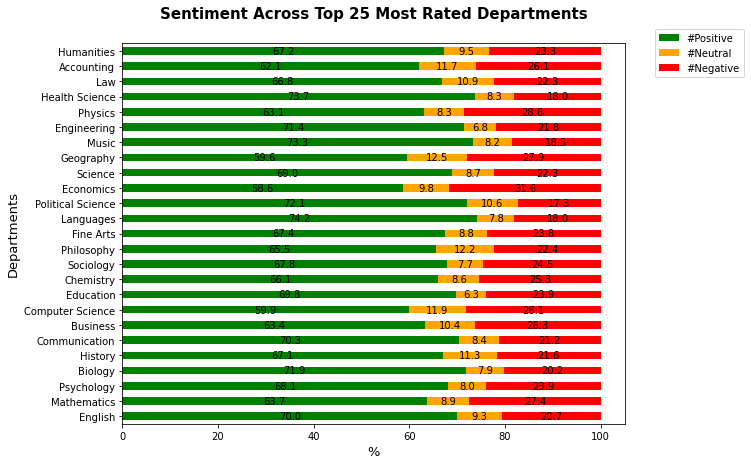

In [276]:

ax = df_dept_chunk.loc[:, ['#Positive', '#Neutral', '#Negative']].plot(kind='barh', stacked=True, 
                                                                  color=['green', 'orange', 'red'],
                                                                  figsize = (9,7),
                                                                  )



for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = ["{:.1f}".format(v.get_width()) if v.get_width() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')


plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.xlabel('%',  fontsize = 13, y=1.1)
plt.ylabel('Departments',  fontsize = 13, x=1.1)
plt.title('Sentiment Across Top 25 Most Rated Departments', fontsize = 15, weight='bold', y=1.05)


### Sentiment over time